In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\Varam\Desktop\Abirami\house-prices-advanced-regression-techniques\train.csv"
house_data=pd.read_csv(path)

In [4]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data.shape

(1460, 81)

In [6]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
Garage_Type_Counts=house_data['GarageType'].value_counts().to_frame()
Garage_Type_Counts.rename(columns={'GarageType':'Value_Counts'},inplace=True)
Garage_Type_Counts

,Value_Counts
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


In [9]:
Garage_Type_Counts.index.name='Garage_Type'
Garage_Type_Counts

,Value_Counts
Garage_Type,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


In [10]:
missing_data=house_data.isnull().sum()
missing_data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

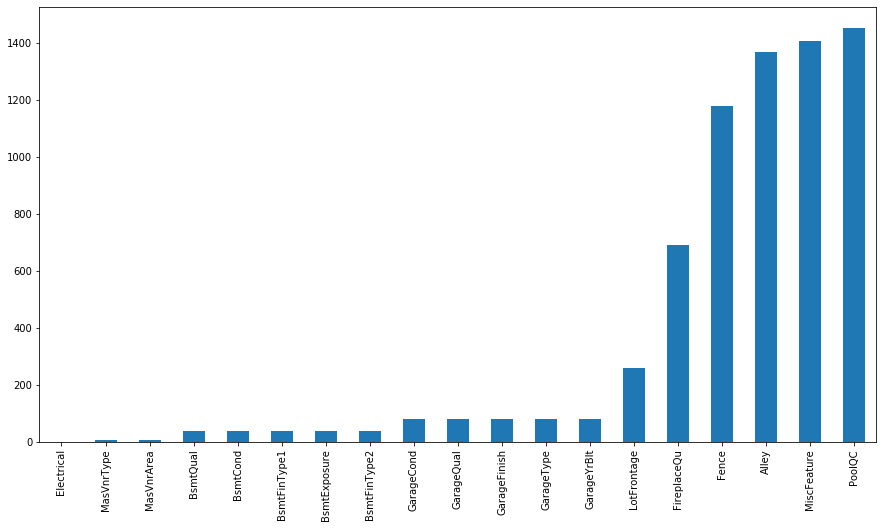

In [11]:

missing_data=missing_data[missing_data>0]
missing_data.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing_data.plot.bar()

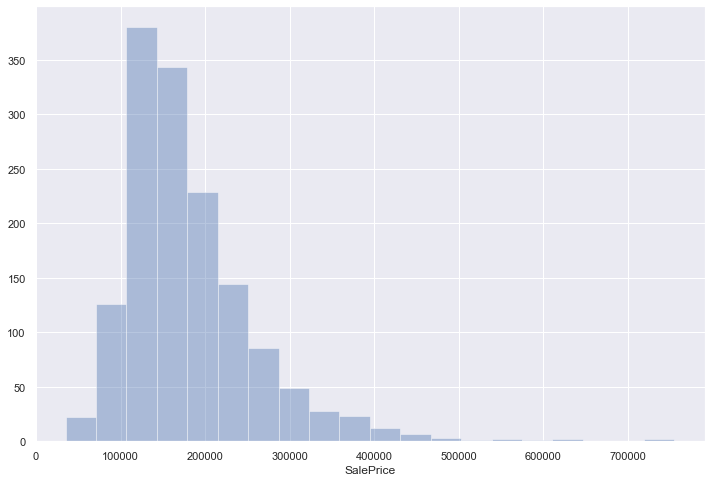

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(house_data['SalePrice'],kde=False,bins=20);

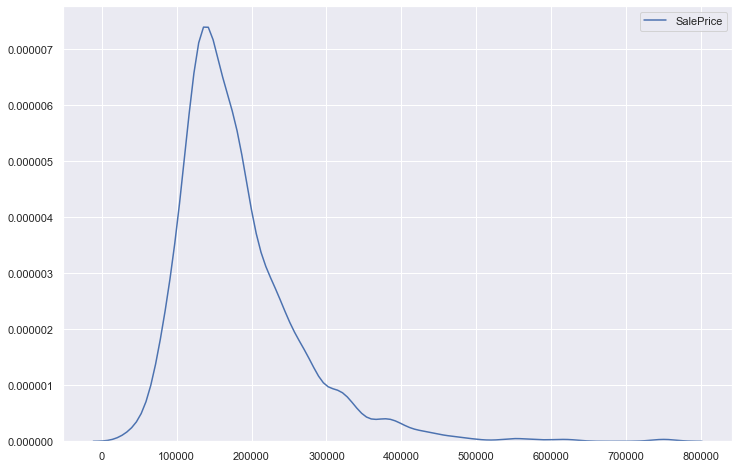

In [13]:
sns.kdeplot(house_data['SalePrice'])

In [14]:
house_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
numeric_features=house_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
categorical_features=house_data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

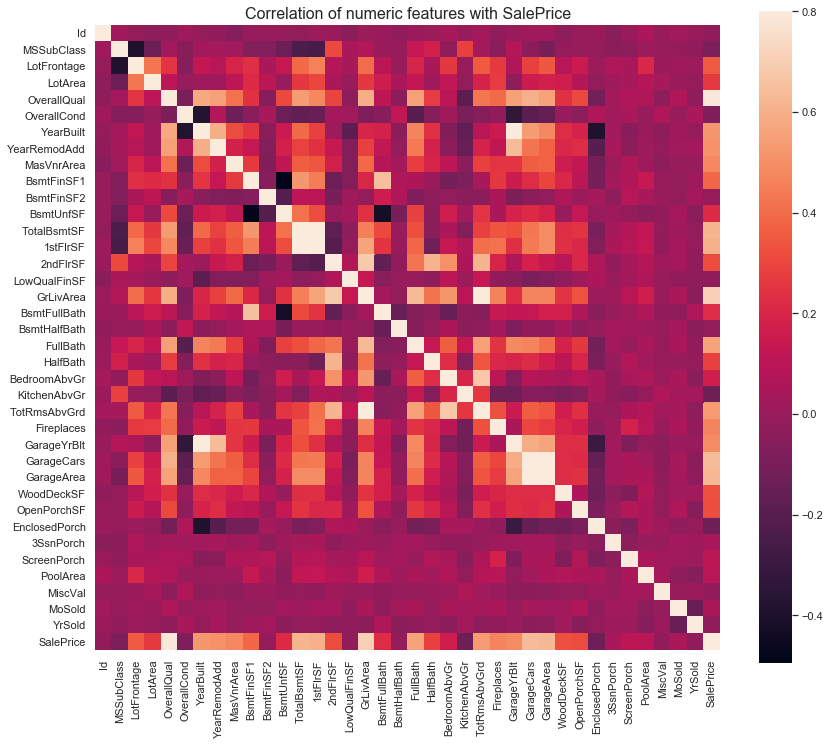

In [18]:
sns.set(rc={'figure.figsize':(14,12)})
plt.title('Correlation of numeric features with SalePrice',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [19]:
k=11
cols=correlation.nlargest(k,'SalePrice').index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


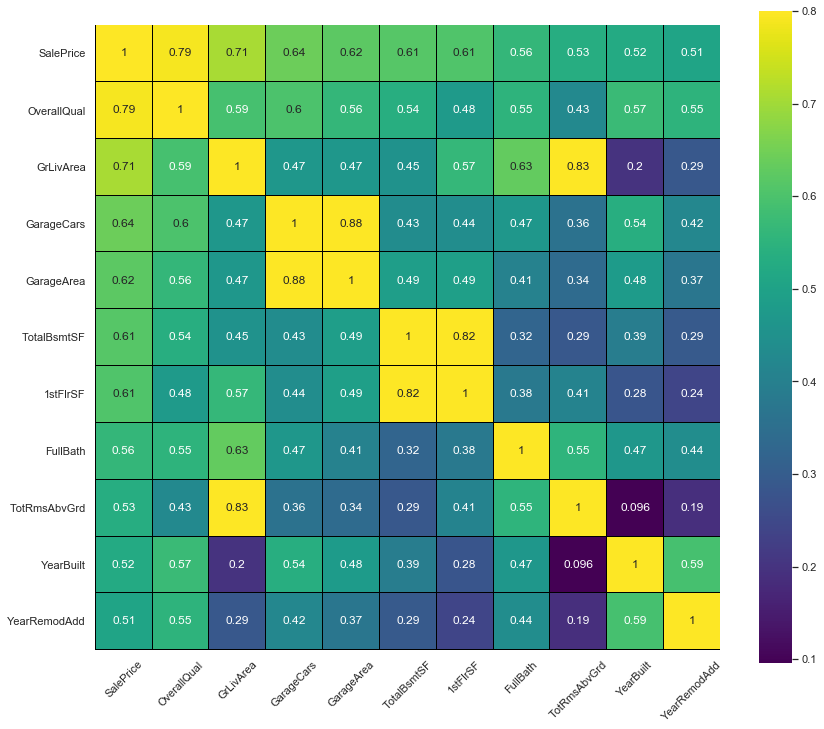

In [20]:
cm=np.corrcoef(house_data[cols].values.T)
sns.set(rc={'figure.figsize':(14,12)})
sns.heatmap(cm,cmap='viridis',square=True,annot=True,vmax=0.8,linewidths=0.02,linecolor='black',xticklabels=cols.values,yticklabels=cols.values)
xt=plt.xticks(rotation=45)

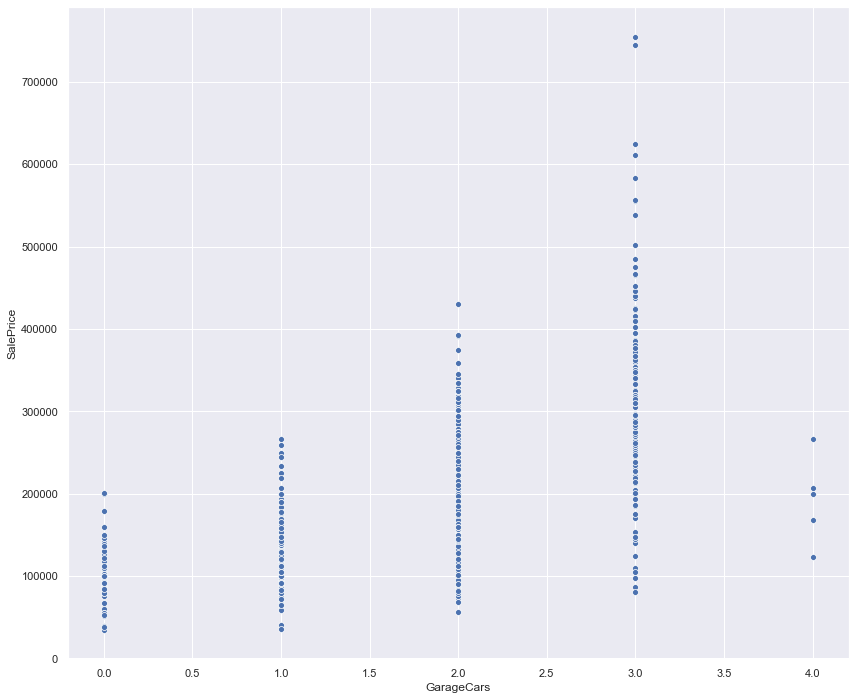

In [21]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=house_data)

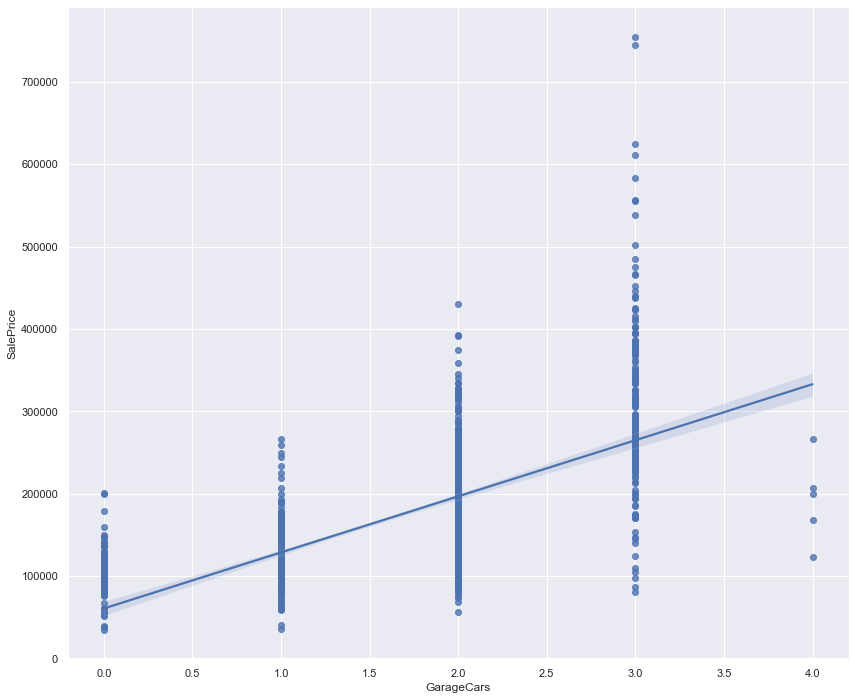

In [22]:
sns.regplot(x='GarageCars',y='SalePrice',data=house_data,scatter=True,fit_reg=True)

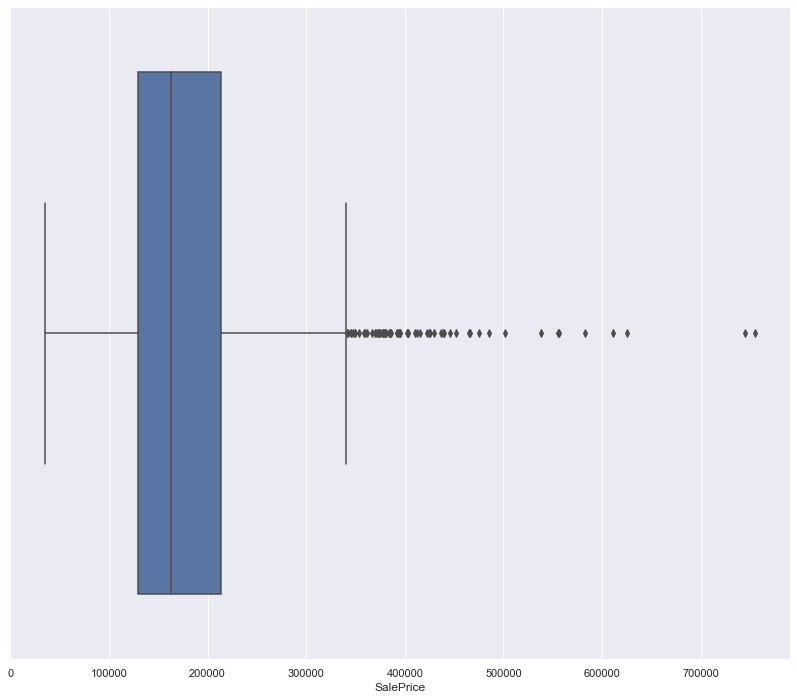

In [23]:
sns.boxplot(x=house_data['SalePrice'])

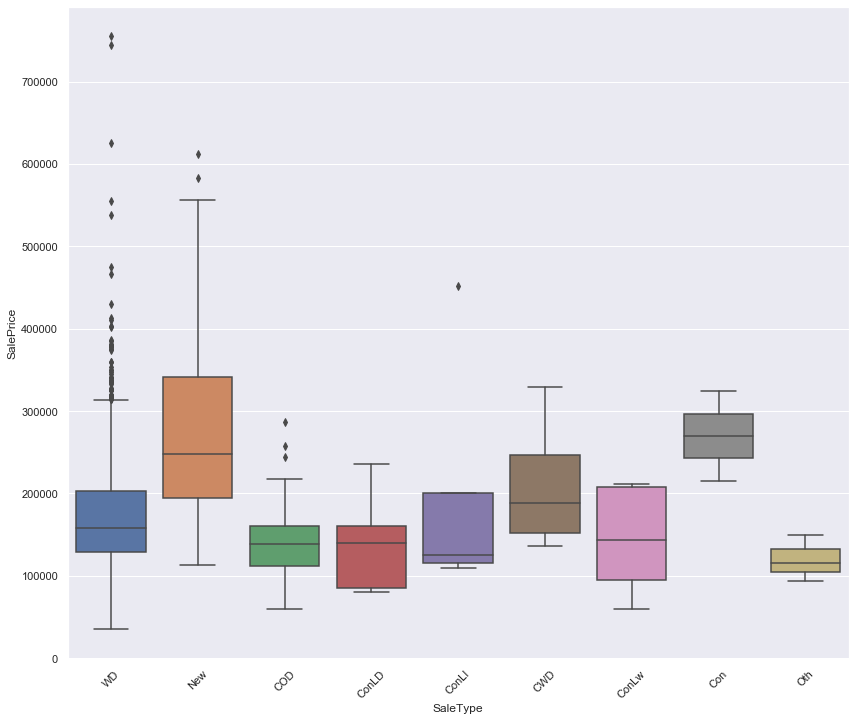

In [24]:
sns.boxplot(x='SaleType',y='SalePrice',data=house_data)
xt=plt.xticks(rotation=45)

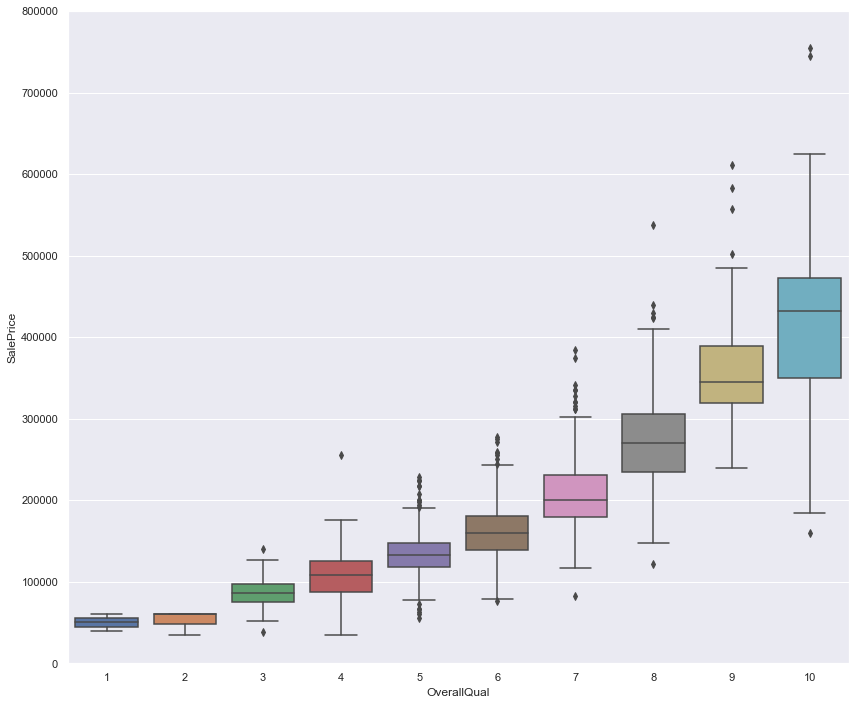

In [25]:
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=house_data)
fig.axis(ymin=0,ymax=800000);

In [26]:
house_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

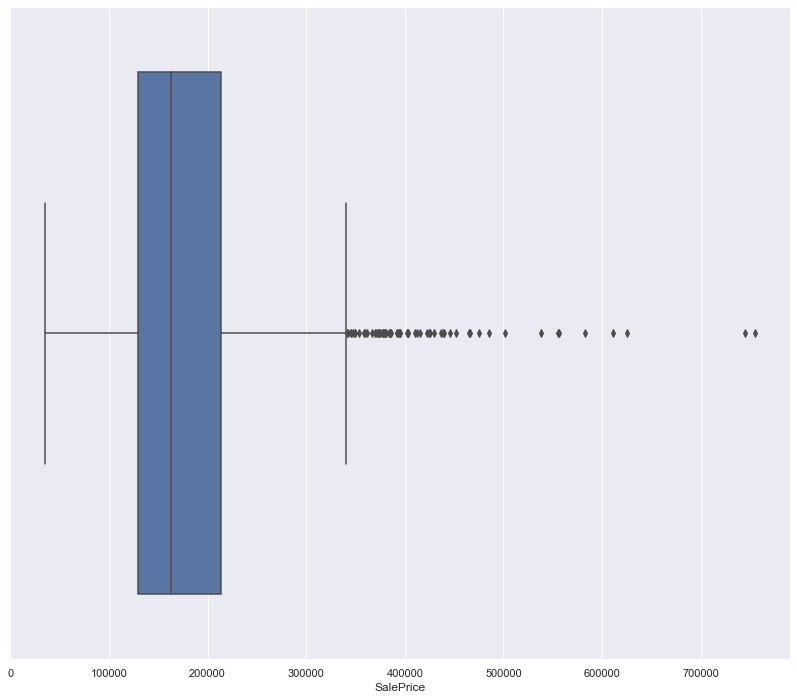

In [27]:
sns.boxplot(x='SalePrice',data=house_data)

In [28]:
house_data.shape

(1460, 81)

In [29]:
first_quartile=house_data['SalePrice'].quantile(.25)
third_quartile=house_data['SalePrice'].quantile(.75)
IQR=third_quartile-first_quartile

In [30]:
new_boundary=third_quartile+3*IQR

In [31]:
house_data.drop(house_data[house_data['SalePrice']>new_boundary].index,axis=0,inplace=True)

In [32]:
house_data.shape

(1448, 81)

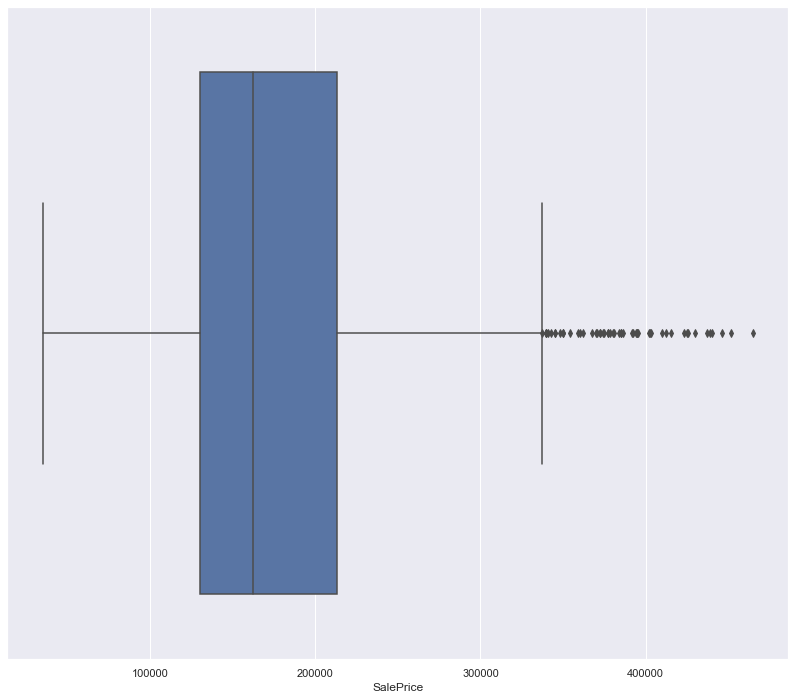

In [33]:
sns.boxplot(house_data['SalePrice'])

In [34]:
cols_to_remove_list = ['WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','ScreenPorch','PoolArea','BedroomAbvGr'  
,'MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch'   
,'KitchenAbvGr','GrLivArea','GarageCars','1stFlrSF','FullBath','FireplaceQu','Fence','Alley','MiscFeature','PoolQC']


In [35]:
house_data.drop(cols_to_remove_list,axis=1,inplace=True)

In [36]:
house_data.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000


In [37]:
house_data.shape

(1448, 50)

In [38]:
house_data.describe()


,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,SalePrice
count,1190.000000,1448.000000,1448.000000,1448.000000,1440.000000,1448.000000,1448.000000,1448.000000,1448.000000,1367.000000,1448.000000,1448.000000
mean,69.787395,6.071823,1971.080110,1984.715470,99.649306,437.830801,1048.615331,6.484807,0.604972,1978.294806,469.889503,177657.070442
std,24.093929,1.353929,30.123527,20.656816,172.085224,447.376015,427.285851,1.587282,0.639651,24.687182,211.660605,70678.078392
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,34900.000000
25%,59.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,794.000000,5.000000,0.000000,1961.000000,326.750000,129900.000000
50%,69.000000,6.000000,1972.000000,1993.000000,0.000000,381.000000,990.000000,6.000000,1.000000,1979.000000,478.000000,162000.000000
75%,80.000000,7.000000,2000.000000,2004.000000,161.250000,705.250000,1284.000000,7.000000,1.000000,2002.000000,576.000000,212925.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,14.000000,3.000000,2010.000000,1418.000000,465000.000000


In [39]:
x=house_data[['OverallQual','SalePrice']]
x.head(20)


,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000
5,5,143000
6,8,307000
7,7,200000
8,7,129900
9,5,118000


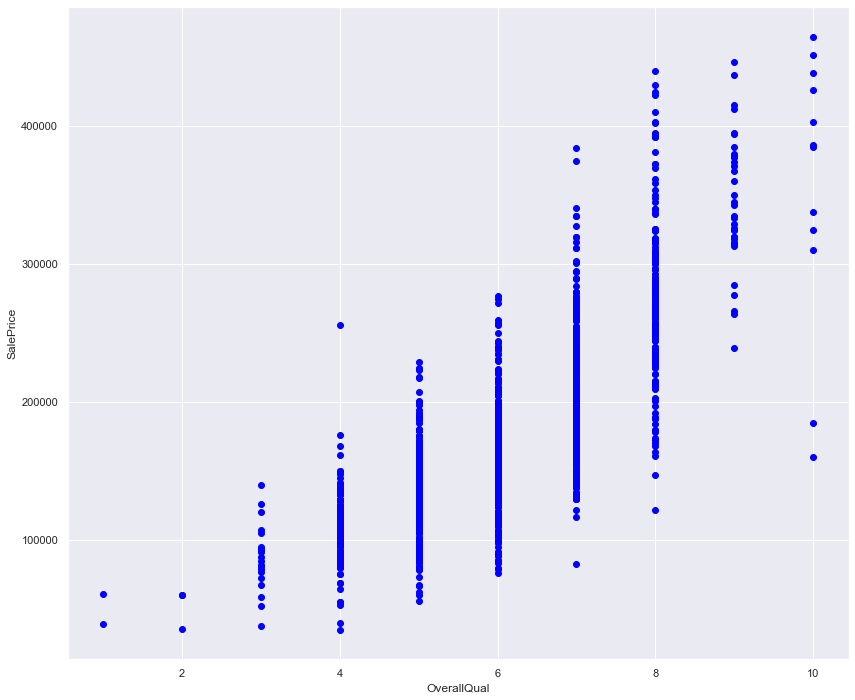

In [40]:
plt.scatter(x.OverallQual,x.SalePrice,color='blue')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [41]:
msk=np.random.rand(len(x))<0.8
train=x[msk]
test=x[~msk]

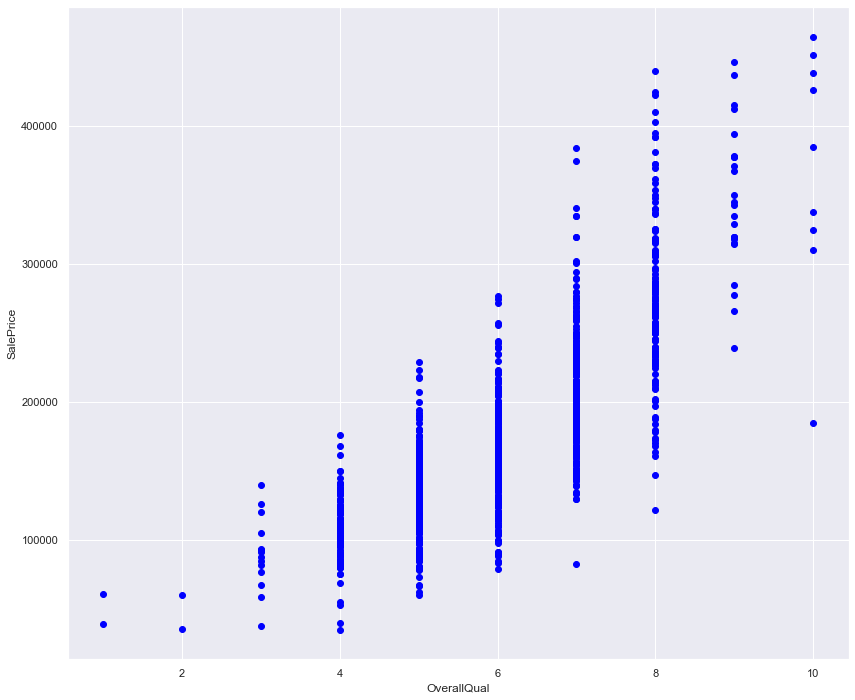

In [42]:
plt.scatter(train.OverallQual,train.SalePrice,color='blue')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [43]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x = np.asanyarray(train[['OverallQual']])
train_y = np.asanyarray(train[['SalePrice']])
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Coefficient:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficient: [[41820.02752208]]
Intercept: [-75976.66582964]


Text(0, 0.5, 'SalePrice')

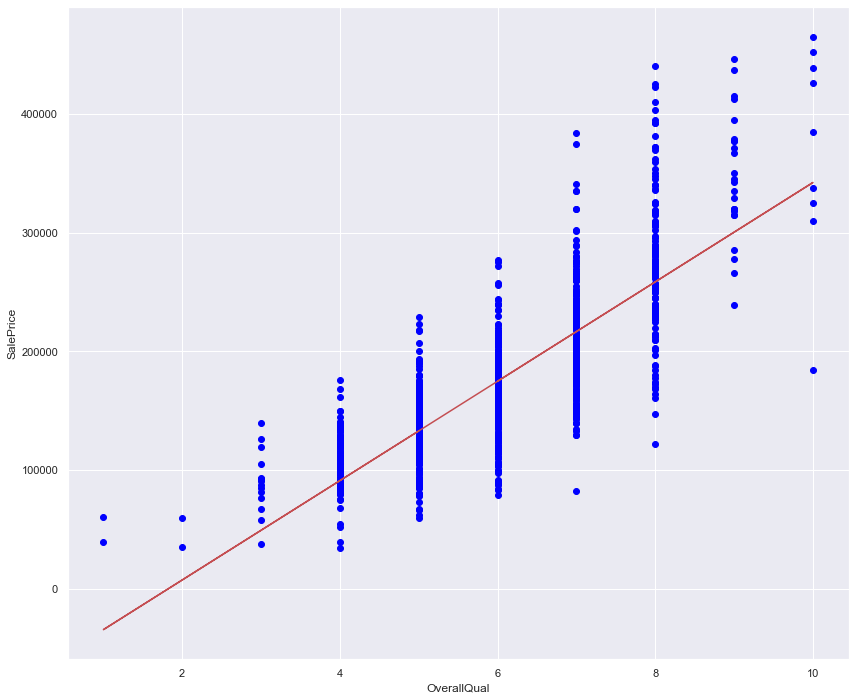

In [45]:
plt.scatter(train.OverallQual, train.SalePrice,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

In [46]:
from sklearn.metrics import r2_score
from math import sqrt
test_x=np.asanyarray(test[['OverallQual']])
test_y=np.asanyarray(test[['SalePrice']])
test_y_hat=regr.predict(test_x)
print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute((test_y_hat-test_y))))
print("Residual sum of error (MSE): %.2f" % np.mean((test_y_hat-test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y_hat,test_y))
print("Root mean squared error (RMSE): %.2f" % np.sqrt(np.mean((test_y_hat-test_y)**2)))
print("Variance Score: %.2f" % regr.score(test_x,test_y))

Mean Absolute Error (MAE): 32592.34
Residual sum of error (MSE): 1911400967.14
R2-Score: 0.42
Root mean squared error (RMSE): 43719.57
Variance Score: 0.63


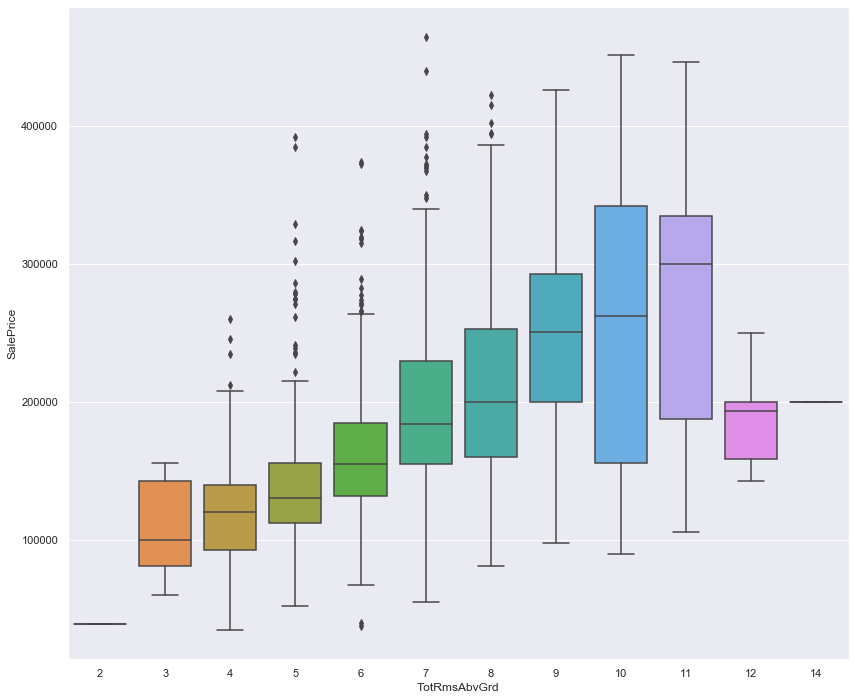

In [47]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=house_data)

In [51]:
x=house_data[['OverallQual']]
y=house_data[['SalePrice']]


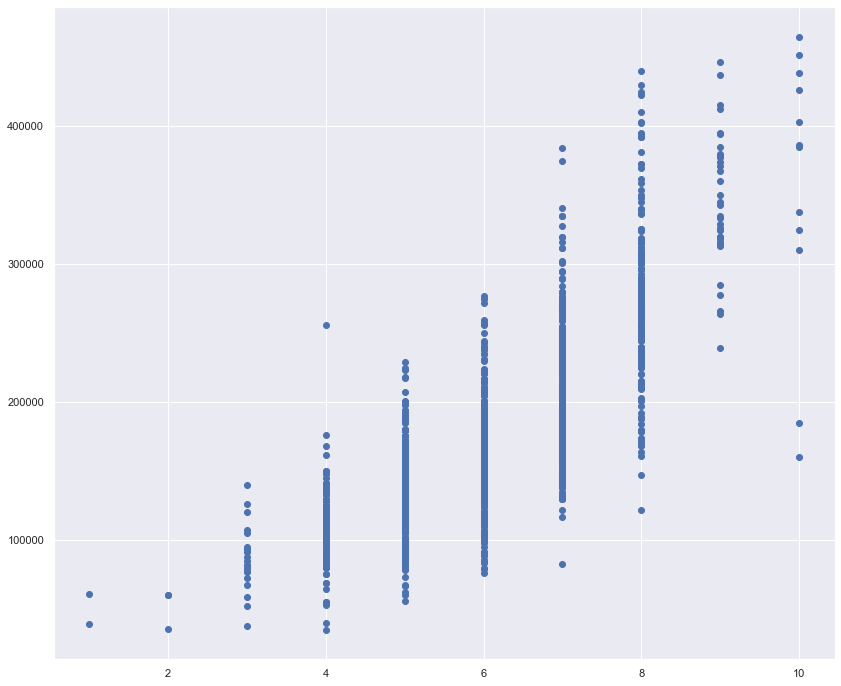

In [60]:

plt.scatter(x,y)

In [61]:
lr=linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
yhat=lr.predict(x)
yhat

array([[216419.36571146],
       [174657.60711757],
       [216419.36571146],
       ...,
       [216419.36571146],
       [132895.84852367],
       [132895.84852367]])

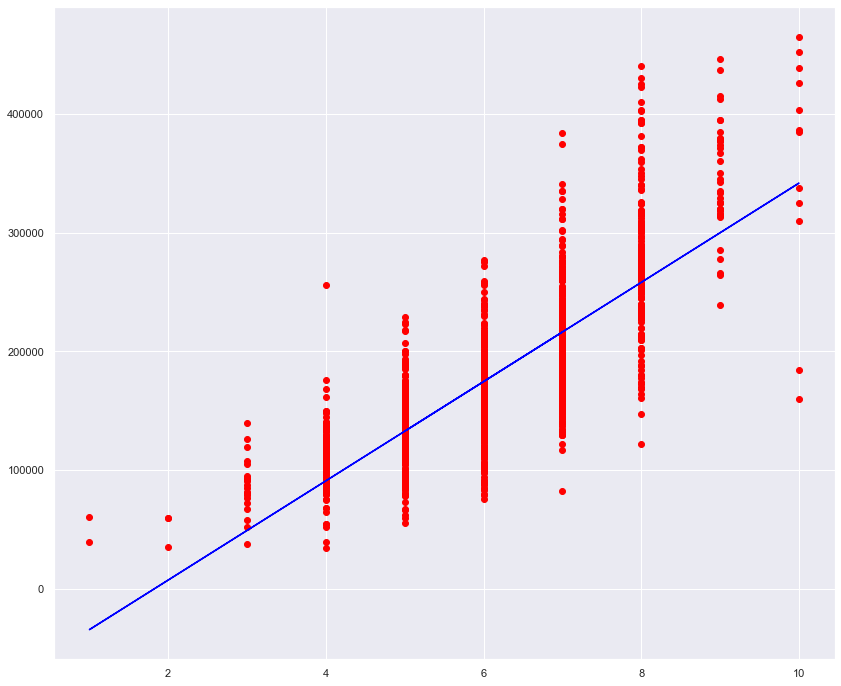

In [63]:
plt.scatter(x,y,color='red')
plt.plot(x,yhat,color='blue')

In [65]:
lr.score(x,y)

0.6399999310261286

In [68]:

r2_score(yhat,y)

0.43749983160674

In [70]:
path=r"C:\Users\Varam\Desktop\Abirami\weight.csv"
df=pd.read_csv(path)

In [71]:
df

,Age,Weight(kg)
0,5,10
1,10,20
2,15,30
3,20,40
4,25,50


In [89]:

age=np.asanyarray(df[['Age']])
weight=np.asanyarray(df[['Weight(kg)']])

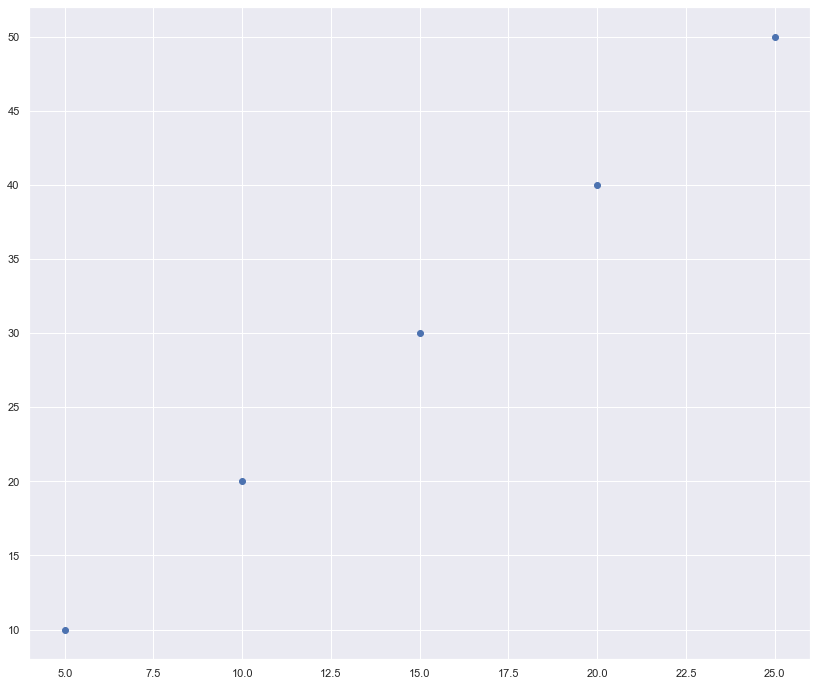

In [90]:
plt.scatter(age,weight)
plt.show()

In [91]:
reg=linear_model.LinearRegression()
reg.fit(age,weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
reg.predict(age)


array([[10.],
       [20.],
       [30.],
       [40.],
       [50.]])

In [95]:
reg.predict(30)

ValueError: Expected 2D array, got scalar array instead:
array=30.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

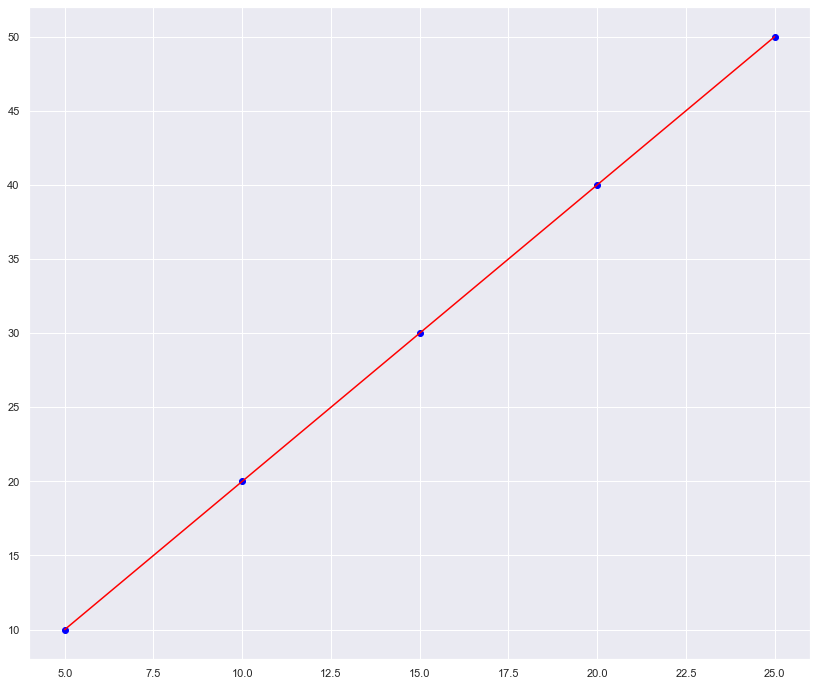

In [80]:
plt.scatter(age,weight,color='blue')
plt.plot(age,yhat1,color='red')

In [81]:
r2_score(yhat1,weight)

1.0

In [82]:
reg.score(age,weight)

1.0